In [2]:
from scipy import misc
from scipy import ndimage
from scipy import signal
import matplotlib.pylab as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm #mapas de colores
import numpy as np

c:\python27\lib\site-packages\ipykernel_launcher.py:1: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  """Entry point for launching an IPython kernel.


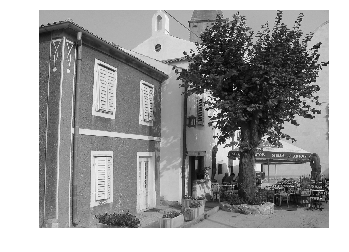

In [4]:
im = misc.imread("foto.jpg",mode="L")
plt.imshow(im, cmap="gray")
plt.axis("off")
plt.show()

# Filtro de Caja

In [3]:
n = 3
f = np.ones((n,n))
f = f/np.sum(f)
print f
print "###################"
print np.sum(f)

[[0.11111111 0.11111111 0.11111111]
 [0.11111111 0.11111111 0.11111111]
 [0.11111111 0.11111111 0.11111111]]
###################
1.0


Aplicamos el filtro mediante la función $\texttt{convolve2d}$

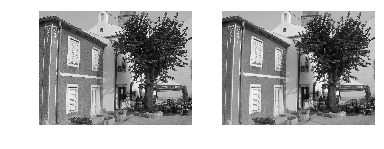

In [4]:
im_s = signal.convolve2d(im, f, boundary="symm")
plt.subplot(121)
plt.imshow(im,cmap = "gray")
plt.axis("off")
plt.subplot(122)
plt.imshow(im_s,cmap = "gray")
plt.axis("off")
plt.show()

# Filtro Gaussiano

In [5]:
#llenamos la matriz de filtro gaussiano
s = 5
n = int(6*s+0.5)
f = np.zeros((n,n))
for i in range(n):
    for j in range(n):
        f[i,j] = np.exp((-(i-n/2)**2-(j-n/2)**2)/(2*s**2))
k = np.sum(f)
f = f/k
f

array([[1.32621210e-06, 1.32621210e-06, 3.60501825e-06, 3.60501825e-06,
        9.79945559e-06, 9.79945559e-06, 9.79945559e-06, 2.66376821e-05,
        2.66376821e-05, 2.66376821e-05, 7.24087271e-05, 7.24087271e-05,
        7.24087271e-05, 7.24087271e-05, 7.24087271e-05, 7.24087271e-05,
        7.24087271e-05, 7.24087271e-05, 7.24087271e-05, 7.24087271e-05,
        7.24087271e-05, 2.66376821e-05, 2.66376821e-05, 2.66376821e-05,
        9.79945559e-06, 9.79945559e-06, 9.79945559e-06, 3.60501825e-06,
        3.60501825e-06, 1.32621210e-06],
       [1.32621210e-06, 3.60501825e-06, 3.60501825e-06, 9.79945559e-06,
        9.79945559e-06, 2.66376821e-05, 2.66376821e-05, 2.66376821e-05,
        7.24087271e-05, 7.24087271e-05, 7.24087271e-05, 7.24087271e-05,
        7.24087271e-05, 1.96827327e-04, 1.96827327e-04, 1.96827327e-04,
        1.96827327e-04, 1.96827327e-04, 7.24087271e-05, 7.24087271e-05,
        7.24087271e-05, 7.24087271e-05, 7.24087271e-05, 2.66376821e-05,
        2.66376821e-05,

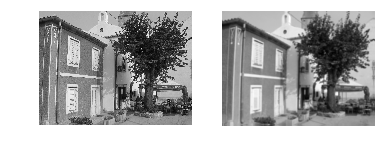

In [6]:
im_s = signal.convolve2d(im, f, boundary="symm")
plt.subplot(121)
plt.imshow(im,cmap = "gray")
plt.axis("off")
plt.subplot(122)
plt.imshow(im_s,cmap = "gray")
plt.axis("off")
plt.show()

Grafica la matriz de filtro gaussiano

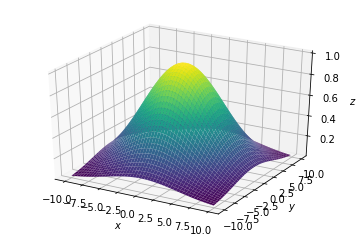

In [7]:
X = np.arange(-n/3, n/3, 0.1)
Y = np.arange(-n/3, n/3, 0.1)
###############################################
X, Y = np.meshgrid(X, Y) #dominio de la función
###############################################
s = 5
Z = np.exp(-(X**2+Y**2)/(2*s**2))
# Z = (X+Y)/(X+Y) #Caja

fig = plt.figure()
ax = fig.gca(projection='3d')
#enviamos un grid (X,Y) los valores correspondientes de altura
ax.plot_surface(X, Y, Z, cmap=cm.viridis)
ax.set_xlabel("$x$")
ax.set_ylabel("$y$")
ax.set_zlabel("$z$")

plt.show()

# Llamados filtros suavizadores

# Filtros derivadores

In [8]:
f_v = np.array([[0, -1, 0], [0, 1, 0]])
f_v

array([[ 0, -1,  0],
       [ 0,  1,  0]])

In [9]:
f_h = np.array([[0,0],[-1,1],[0,0]])
f_h

array([[ 0,  0],
       [-1,  1],
       [ 0,  0]])

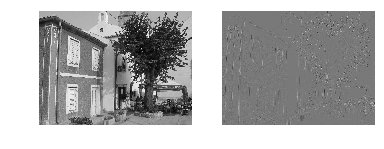

In [10]:
dh = signal.convolve2d(im, f_h, boundary="symm")
plt.subplot(121)
plt.imshow(im,cmap = "gray")
plt.axis("off")
plt.subplot(122)
plt.imshow(dh,cmap = "gray")
plt.axis("off")
plt.show()

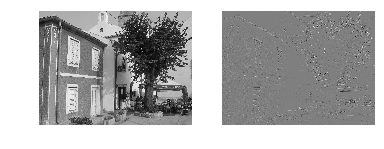

In [11]:
dv = signal.convolve2d(im, f_v, boundary="symm")
plt.subplot(121)
plt.imshow(im,cmap = "gray")
plt.axis("off")
plt.subplot(122)
plt.imshow(dv,cmap = "gray")
plt.axis("off")
plt.show()

In [12]:
# GI = np.zeros(im.shape)
im.shape
# for 


(1200, 1600)

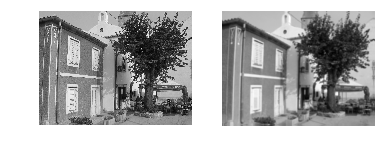

In [13]:
# Se aplica un filtro pasa-baja
plt.subplot(121)
plt.imshow(im,cmap = "gray")
plt.axis("off")
plt.subplot(122)
plt.imshow(im_s,cmap = "gray")
plt.axis("off")
plt.show()

In [5]:
ImgS_dh = signal.convolve2d(im, im_s, boundary="symm")
# ImgS_dv = signal.convolve2d(im, f_v, boundary="symm")


plt.subplot(121)
plt.imshow(im, cmap = "gray")
plt.axis("off")
plt.subplot(122)
plt.imshow(ImgS_dh,cmap = "gray")
plt.axis("off")
plt.show()


# plt.subplot(121)
# plt.imshow(im,cmap = "gray")
# plt.axis("off")
# plt.subplot(122)
# plt.imshow(ImgS_dv,cmap = "gray")
# plt.axis("off")
# plt.show()

NameError: name 'im_s' is not defined